# ACRONYM Dataset Exploration Custom

## Input Params

In [27]:
mesh_root = "data/ShapeNetSem_restructured/"
# filepath = "data/grasps/TV_dfbce5e6cca00c1448627a76b6268107_0.0038627305095302734.h5"
filepath = "data/grasps/TV_dfbce5e6cca00c1448627a76b6268107_0.003957748840105706.h5"
num_grasps = 20

In [28]:
RED = [255, 0, 0]
GREEN = [0, 255, 0]
BLUE = [0, 0, 255]

## Read Mesh

In [29]:
import h5py
import trimesh
import os

# Read in mesh
scale = None
data = h5py.File(filepath, "r")
mesh_fname = data["object/file"][()].decode('utf-8')
mesh_scale = data["object/scale"][()] if scale is None else scale
obj_mesh = trimesh.load(os.path.join(mesh_root, mesh_fname))
obj_mesh = obj_mesh.apply_scale(mesh_scale)

In [30]:
obj_mesh

<trimesh.Scene(len(geometry)=3)>

## Read Grasps

In [31]:
# Get grasps
import numpy as np
transforms = np.array(data["grasps/transforms"])
success = np.array(data["grasps/qualities/flex/object_in_gripper"])

In [32]:
transforms.shape

(2000, 4, 4)

In [33]:
success.shape

(2000,)

## Visualize Grasps

In [34]:
# Visualize grasps
from acronym_tools import create_gripper_marker
successful_grasps = [
    create_gripper_marker(color=GREEN).apply_transform(t)
    for t in transforms[np.random.choice(np.where(success == 1)[0], num_grasps)]
]
failed_grasps = [
    create_gripper_marker(color=RED).apply_transform(t)
    for t in transforms[np.random.choice(np.where(success == 0)[0], num_grasps)]
]

trimesh.Scene([obj_mesh] + successful_grasps + failed_grasps).show()


In [35]:
# Visualize identity transform grasp, identity + z translation, identity + z + x translation
identity = np.eye(4)

identity_plus_z = np.eye(4)
identity_plus_z[:3, 3] = [0.0, 0.0, 0.1]

identity_plus_xz = np.eye(4)
identity_plus_xz[:3, 3] = [0.1, 0.0, 0.1]

transform_color_pairs = [
    (identity, RED),
    (identity_plus_z, GREEN),
    (identity_plus_xz, BLUE),
]

grasps = [
    create_gripper_marker(color=color).apply_transform(transform)
    for transform, color in transform_color_pairs
]

trimesh.Scene([obj_mesh] + grasps).show()


## Look Into HDF5 File

In [36]:
data.keys()

<KeysViewHDF5 ['grasps', 'gripper', 'object']>

In [37]:
def print_attrs(name, obj):
    if isinstance(obj, h5py.Group):
        print(name)
    else:
        print(f"{name}: {obj.shape}")

data.visititems(print_attrs)

grasps
grasps/qualities
grasps/qualities/flex
grasps/qualities/flex/object_in_gripper: (2000,)
grasps/qualities/flex/object_motion_during_closing_angular: (2000,)
grasps/qualities/flex/object_motion_during_closing_linear: (2000,)
grasps/qualities/flex/object_motion_during_shaking_angular: (2000,)
grasps/qualities/flex/object_motion_during_shaking_linear: (2000,)
grasps/transforms: (2000, 4, 4)
gripper
gripper/configuration: (1,)
gripper/type: ()
object
object/com: (3,)
object/density: ()
object/file: ()
object/friction: ()
object/inertia: (3, 3)
object/mass: ()
object/scale: ()
object/volume: ()


In [38]:
root_keys = []
def store_root_keys(name, obj):
    if not isinstance(obj, h5py.Group):
        root_keys.append(name)

data.visititems(store_root_keys)
root_keys

['grasps/qualities/flex/object_in_gripper',
 'grasps/qualities/flex/object_motion_during_closing_angular',
 'grasps/qualities/flex/object_motion_during_closing_linear',
 'grasps/qualities/flex/object_motion_during_shaking_angular',
 'grasps/qualities/flex/object_motion_during_shaking_linear',
 'grasps/transforms',
 'gripper/configuration',
 'gripper/type',
 'object/com',
 'object/density',
 'object/file',
 'object/friction',
 'object/inertia',
 'object/mass',
 'object/scale',
 'object/volume']

In [39]:
root_keys_with_multiple_values = [key for key in root_keys if len(data[key].shape) > 0]
root_keys_with_multiple_values

['grasps/qualities/flex/object_in_gripper',
 'grasps/qualities/flex/object_motion_during_closing_angular',
 'grasps/qualities/flex/object_motion_during_closing_linear',
 'grasps/qualities/flex/object_motion_during_shaking_angular',
 'grasps/qualities/flex/object_motion_during_shaking_linear',
 'grasps/transforms',
 'gripper/configuration',
 'object/com',
 'object/inertia']

In [40]:
root_keys_with_single_value = [key for key in root_keys if key not in root_keys_with_multiple_values]
root_keys_with_single_value

['gripper/type',
 'object/density',
 'object/file',
 'object/friction',
 'object/mass',
 'object/scale',
 'object/volume']

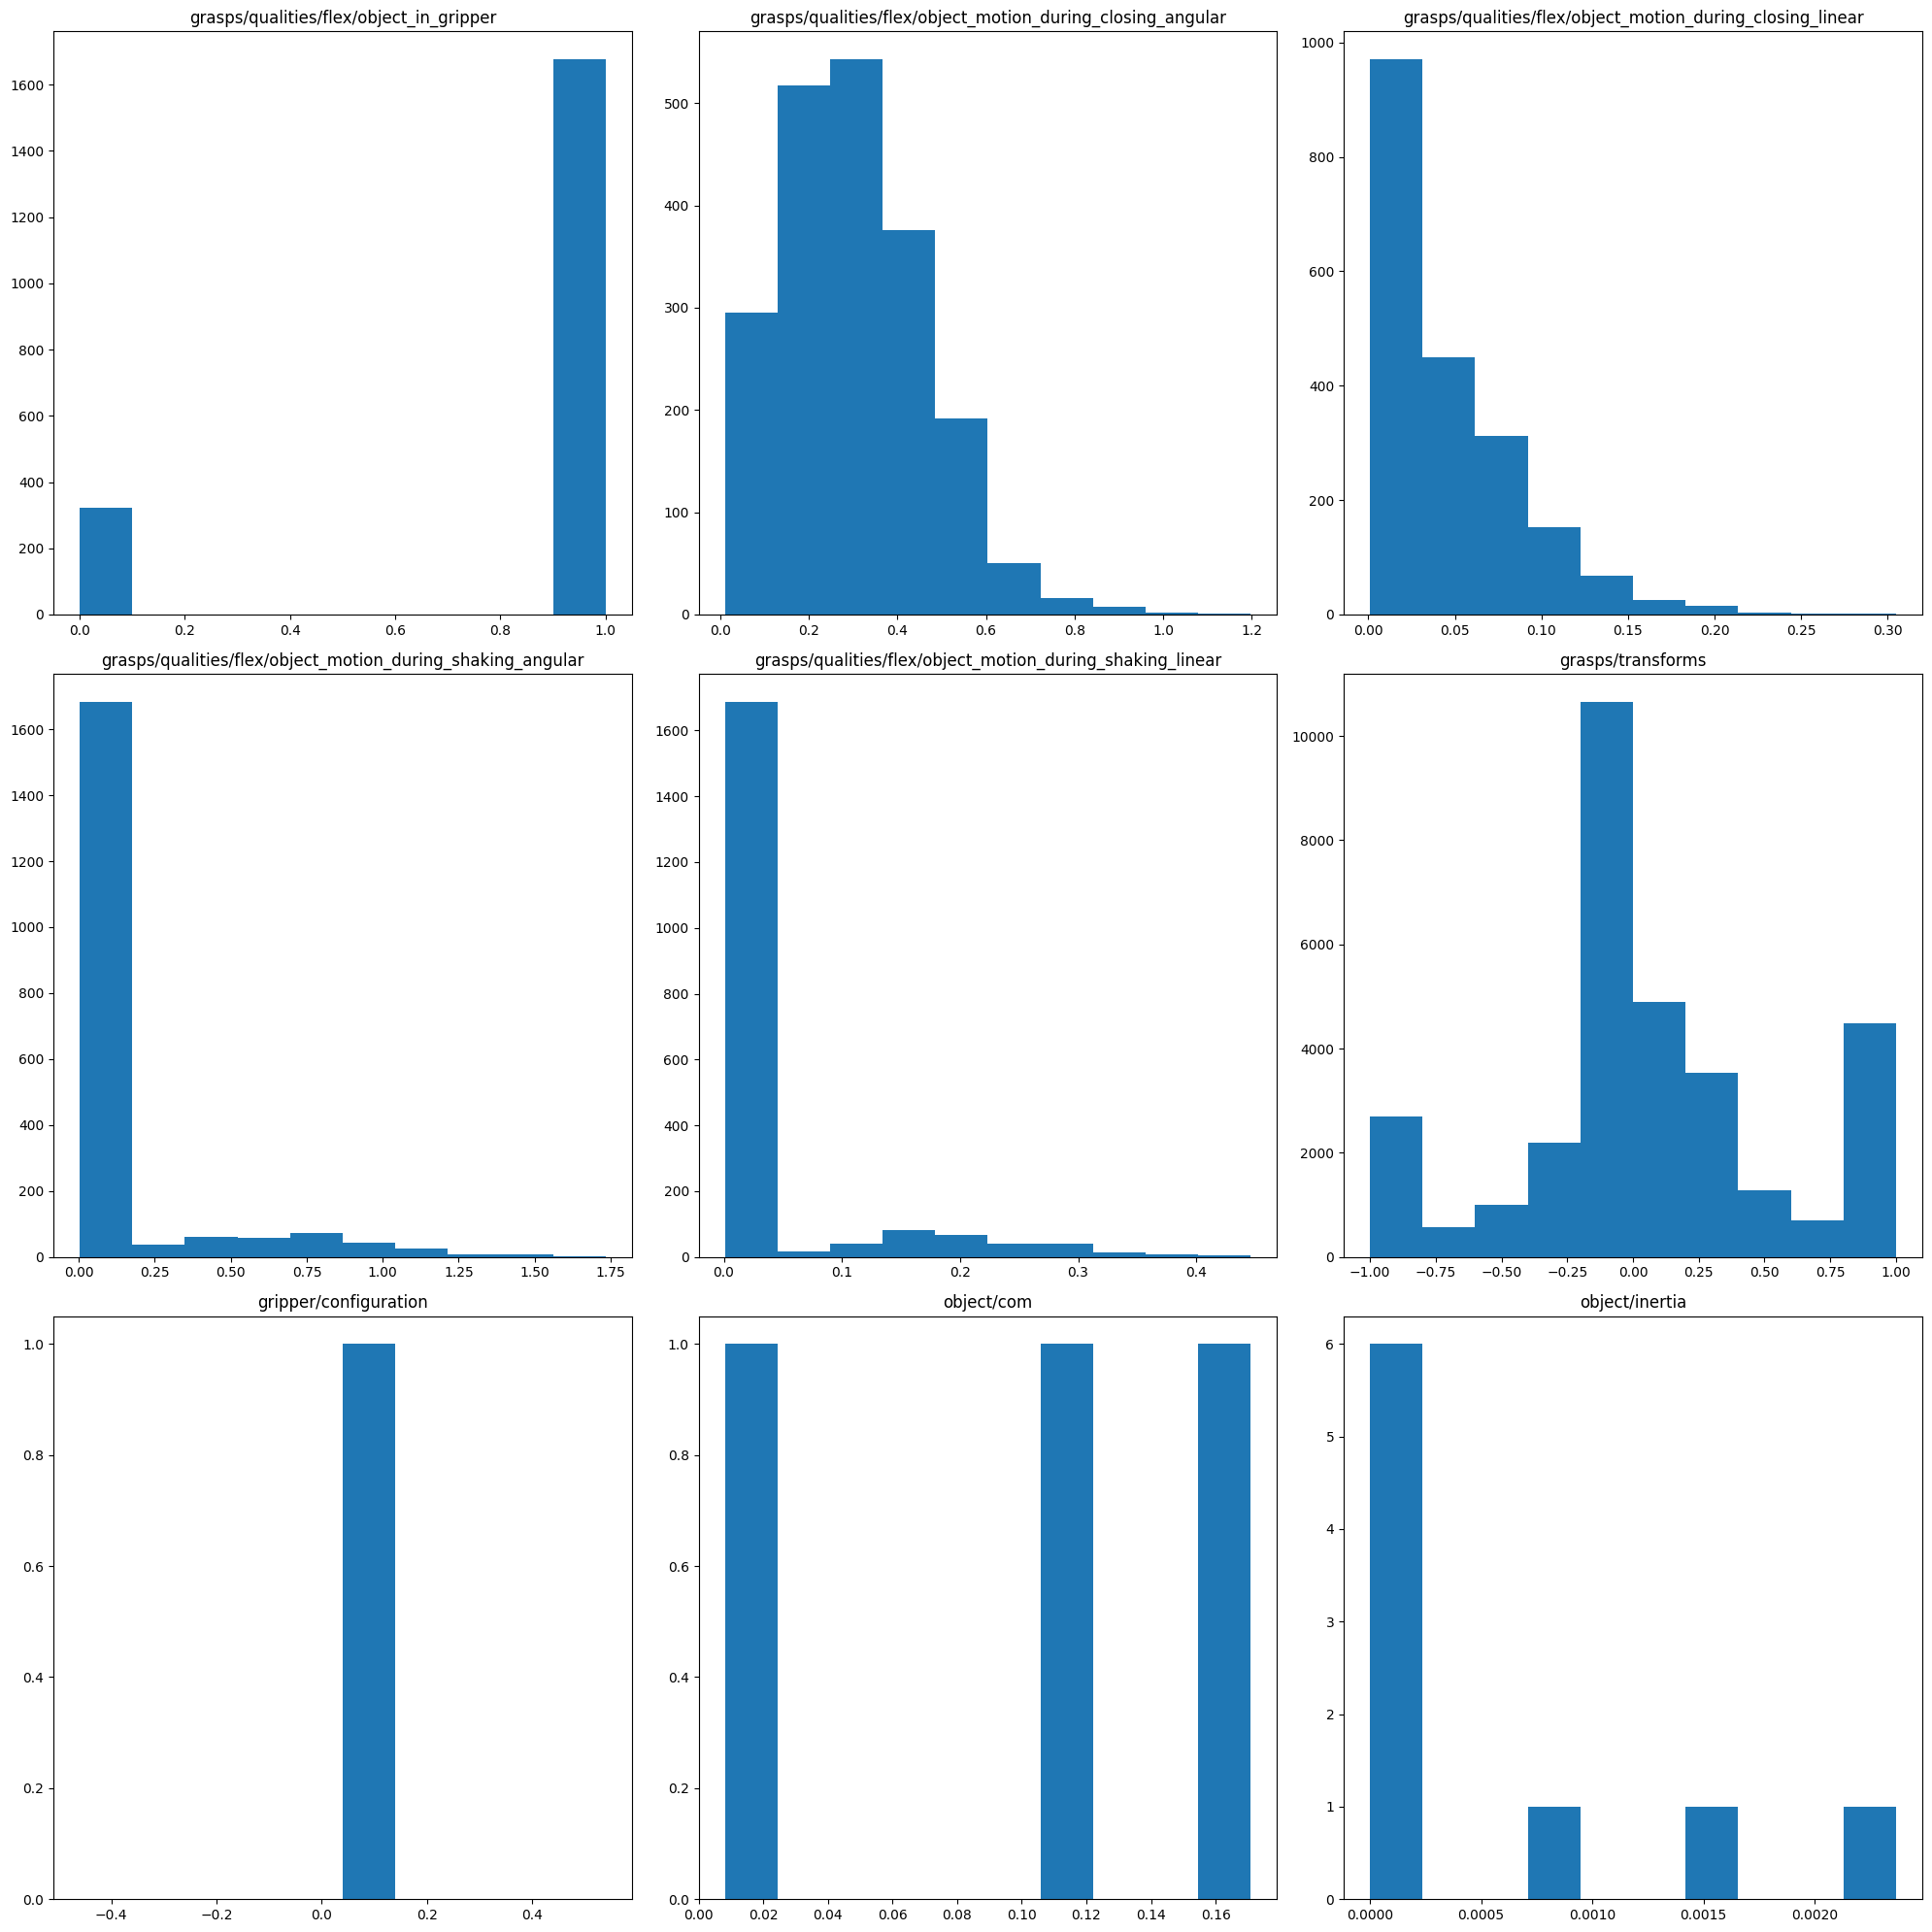

In [41]:
import matplotlib.pyplot as plt
import math
import numpy as np
num_plots = len(root_keys_with_multiple_values)
num_rows = int(math.sqrt(num_plots))
num_cols = int(math.ceil(num_plots / num_rows))

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 20))
axes = axes.flatten()
for i, root_key_with_multiple_values in enumerate(root_keys_with_multiple_values):
    ax = axes[i]
    ax.hist(np.array(data[root_key_with_multiple_values]).flatten())
    ax.set_title(root_key_with_multiple_values)

fig.tight_layout()

In [42]:
for root_key_with_single_value in root_keys_with_single_value:
    print(f"{root_key_with_single_value}: {data[root_key_with_single_value][()]}")

gripper/type: b'panda'
object/density: 150.0
object/file: b'meshes/TV/dfbce5e6cca00c1448627a76b6268107.obj'
object/friction: 1.0
object/mass: 0.171279777
object/scale: 0.0039577488
object/volume: 0.0011418652
